In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import math

In [2]:
# Load the CSV files into a list of DataFrames
data_dir = "data/keog/"

os.environ['OMP_NUM_THREADS'] = '1'

PRINT = True
SAVE = False
dataframes = []
dates = []
clusters = 2

for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(data_dir, file))
        dataframes.append(df)
        first_date = df['datetime'].iloc[0][:10]
        dates.append(first_date)

In [3]:
heatmaps = []  
heatmaps_imputed = []  

imputer = SimpleImputer(strategy='mean')

for df in dataframes:
    XX, YY = np.meshgrid(df['time_seconds'].unique(), df['gdlat'].unique())
    ZZ = df['blrmvd'].values
    ZZ = np.reshape(ZZ, XX.T.shape).T

    heatmaps.append(ZZ)

    hmi = imputer.fit_transform(ZZ).flatten()
    if hmi.size == 1125:
        heatmaps_imputed.append(hmi)
    else:
        continue

heatmaps_imputed = np.vstack(heatmaps_imputed)


c:\Users\Maria\anaconda3\envs\gradu\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [106]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Maria\anaconda3\envs\gradu\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [59 60 61 62]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [4]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=clusters)  # Adjust number of clusters as needed
labels = kmeans.fit_predict(heatmaps_imputed)

c:\Users\Maria\anaconda3\envs\gradu\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
# Print the dates for each cluster
for i in range(clusters):
    cluster_indices = np.where(labels == i)[0]
    print(f"Cluster {i}:")
    for idx in cluster_indices:
        print(f" - Date: {dates[idx]}")

Cluster 0:
 - Date: 2022-01-21
 - Date: 2022-02-07
 - Date: 2022-03-13
 - Date: 2022-03-18
 - Date: 2022-03-25
 - Date: 2022-04-02
 - Date: 2022-04-22
 - Date: 2022-04-23
 - Date: 2022-05-05
 - Date: 2022-05-28
 - Date: 2022-06-20
 - Date: 2022-07-03
 - Date: 2022-07-26
 - Date: 2022-09-04
 - Date: 2022-09-06
 - Date: 2022-09-26
 - Date: 2022-10-05
 - Date: 2022-10-09
 - Date: 2022-10-27
 - Date: 2022-11-20
 - Date: 2022-12-09
 - Date: 2022-12-28
 - Date: 2023-01-04
 - Date: 2023-01-13
 - Date: 2023-01-18
 - Date: 2023-02-19
 - Date: 2023-03-08
 - Date: 2023-03-19
 - Date: 2023-03-21
 - Date: 2023-03-22
 - Date: 2023-03-29
Cluster 1:
 - Date: 2019-01-16
 - Date: 2019-01-19
 - Date: 2019-01-21
 - Date: 2019-01-24
 - Date: 2019-01-31
 - Date: 2019-02-15
 - Date: 2019-02-27
 - Date: 2019-02-28
 - Date: 2019-03-20
 - Date: 2019-03-24
 - Date: 2019-04-06
 - Date: 2019-04-25
 - Date: 2019-04-29
 - Date: 2019-05-08
 - Date: 2019-06-10
 - Date: 2019-06-13
 - Date: 2019-06-19
 - Date: 2019-06-2

Cluster 0: 31 heatmaps


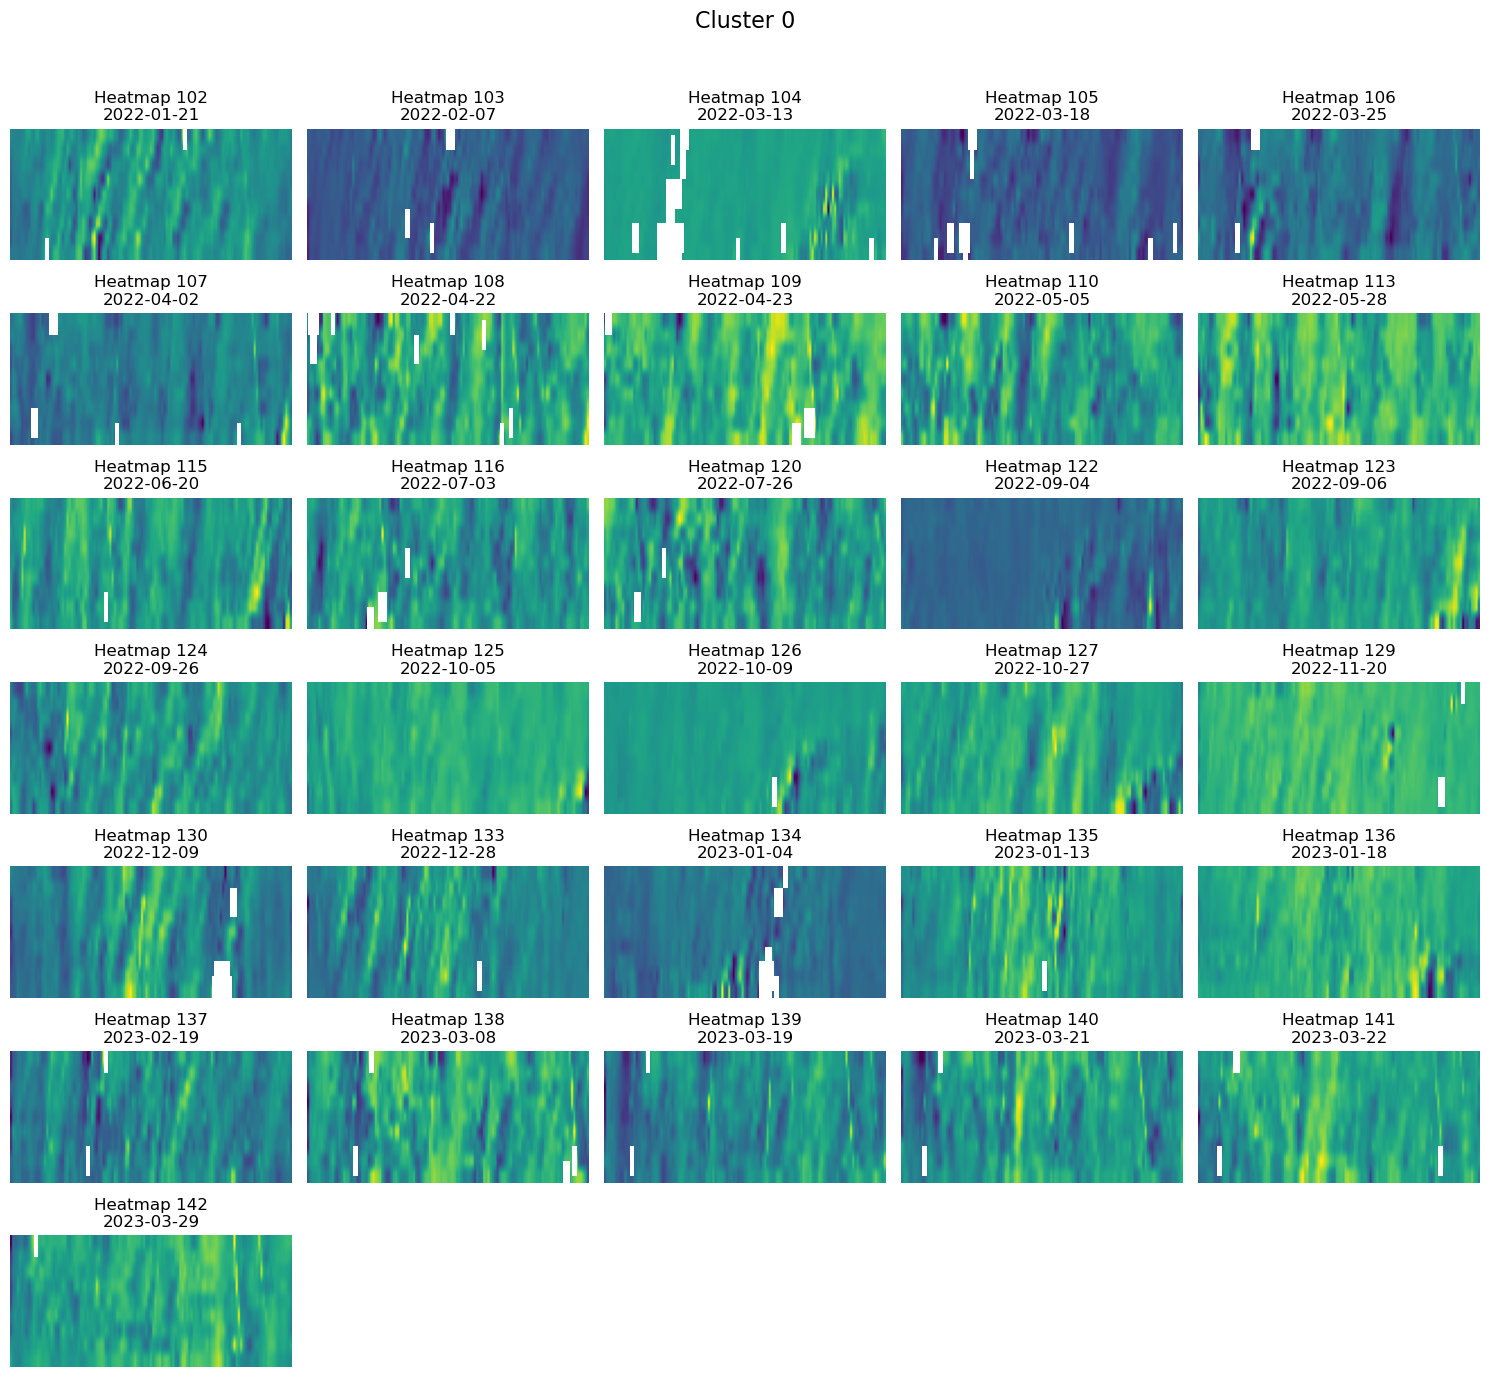

Cluster 1: 112 heatmaps


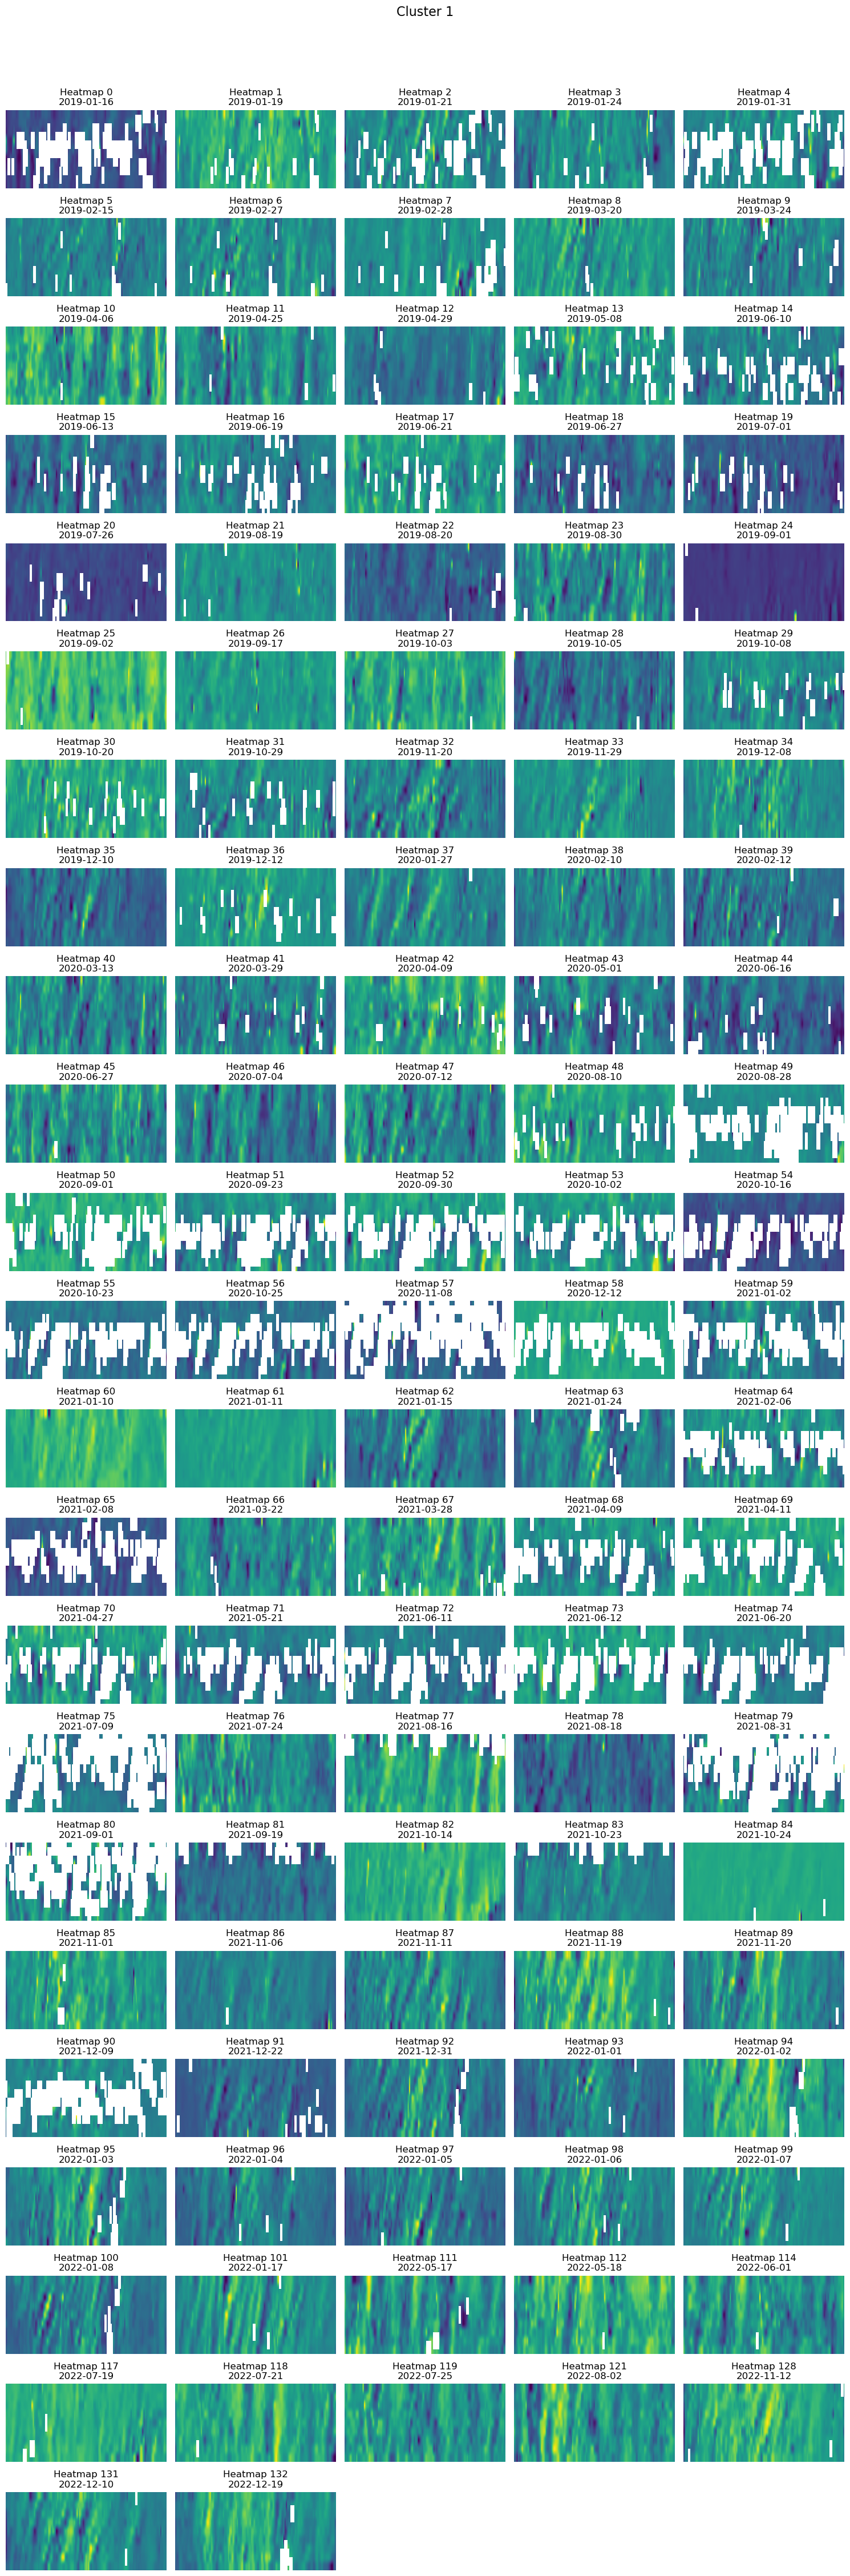

In [6]:
if PRINT:
    for i in range(clusters):
        cluster_indices = np.where(labels == i)[0]
        n_images = len(cluster_indices)
        print(f"Cluster {i}: {n_images} heatmaps")

        # Setup subplot grid
        n_cols = 5
        n_rows = math.ceil(n_images / n_cols)
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2*n_rows))
        axes = axes.flatten()  # Flatten for easy indexing

        for j, idx in enumerate(cluster_indices):
            ax = axes[j]
            ax.imshow(heatmaps[idx], aspect='auto', cmap='viridis')
            ax.set_title(f"Heatmap {idx}\n{dates[idx]}")
            ax.axis('off')  # Hide axes for cleaner layout

        # Hide unused subplots
        for k in range(j+1, len(axes)):
            axes[k].axis('off')

        fig.suptitle(f'Cluster {i}', fontsize=16)
        fig.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for title
        plt.show()

In [7]:
data = {}
data['dates'] = dates
data['labels'] = labels

if SAVE == True:
    datadf = pd.DataFrame(data, columns=['dates', 'labels'])
    datadf.to_csv(f'data/klusterit/klusteri{clusters}.csv')